# Assignment: Incompressible Single-Phase 1D Simulator
### In this assignment, you will be asked to build an incompressible simulator for a single-phase 1D problem. 

In this block, you will import all the necessary libraries and set the necessary variables that will be used in the simulation. nx represents the number of horizontal distance intervals, k represents the permeability values which can be uniform or varied over the reservoir. The length of the reservoir is defined as length in meters. pres_ini represents the initial pressure in the reservoir in bars, pres_inj represents the pressure at the injection well, and pres_prd represents the pressure at the production well. mu_w represents the viscosity of water in cPoise

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the given values of our problem:
nx = 10        # Number of horizontal distance intervals
k = np.ones(nx)*160  

length = 1200   # lenght of reservoir in m
 
pres_ini = 150  # initial pressure in reservoir in bars
pres_inj = 200  # injection pressure in bars
pres_prd = 100  # production pressure in bars

mu_w = 1     # viscosity of water in cpoise

Add two functions for printing the Jacobian and RHS

In [35]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
def vecprint(x, fmt="g"):
    for i, y in enumerate(x):
        print(("{:"+str(i)+fmt+"}").format(y), end="  ")
    print("")    

In this block, you will define a relationship that calculates a value called $\Psi$ based on the $k$, $\mu_w$, and $\Delta x$ inputs. Then, you will calculate the distance between each point in the reservoir if they are equally spaced, which is given by $\Delta x$. The value of x is an array of the x-coordinates of the points and $\Psi$ is a calculated array that contains the value of $\Psi$ at each point.

$\Psi = {k_x}/({\mu \Delta x^2})$

In [36]:
# Calculating the distance between each point if we equally space them 
dx = length / (nx - 1)
x = np.linspace(0, length, nx)

Psi = k / mu_w / dx**2

Implement a function called "get_matrix" that takes in two variables, the number of degrees of points "n" and the constant "Psi". The function should return a matrix "K". The student should create a n x n matrix filled with zeros using numpy and then for each point from 1 to n-1, add the influence of the point and its surroundings on the matrix. The influence on each point should be calculated by adding 2 times $\Psi$ to the value on the diagonal of the matrix, subtracting $\Psi$ from the value on the row above the diagonal and subtracting $\Psi$ from the value on the row below the diagonal. The final result should be the matrix K.

\begin{equation}
\label{incompressible_flow_discretized}
{\Psi p_{i+1} - 2\Psi p_i + \Psi p_{i-1}} = 0.
\end{equation}


In [37]:
# %%
# The get_Matrix function which returns matrix K and receives as variables:
# - The number of degrees of points "n"
# - The distance between points "dx" (Δx in the equations)
# - The constant "nu"
def get_matrix(n, Psi):
    
    # Create an n x n matrix with zeros on every entry
    K = np.zeros((n,n))
    
    # For each point in from 1 to n-1 add the influence of the point and of it's surroundings
    for i in range(1, n-1):
        K[i, i] = 2 * Psi[i]
        K[i, i-1] = - Psi[i]
        K[i, i+1] = - Psi[i]
        
    return K

Implement the function apply_BCs which takes as inputs a matrix K, a vector f, the value of pressure P_left at the injection well, the value of pressure P_right at the production well, the well transmisibility coefficient tau, and the value of the mobility term Psi. The function adjusts the matrices K and f to account for boundary conditions by updating the first and last rows of matrix K and first and last entries of vector f as follows: for the first row of K, the first entry is set to the sum of tau[0] and Psi[0], the second entry is set to the negative of Psi[0], and the first entry of f is set to the product of tau[0] and P_left. For the last row of K, the last entry is set to the sum of tau[-1] and Psi[-1], the second-to-last entry is set to the negative of Psi[-1], and the last entry of f is set to the product of tau[-1] and P_right.

\begin{equation}
\label{incompressible_flow_discretized_boundary}
{-\Psi p_1 + 2 \Psi p_0} = \Psi p^{wi}, \quad { 2 \Psi p_{n-1} - \Psi p_{n-2}} = \Psi p^{wp}.
\end{equation}




In [38]:
## %%
# The apply_BCs function adapts matrix K and vector f to ensure boundary conditions will be satisfied. Inputs:
# - K matrix
# - f vector
# - the temperature on the left side "T_left"
# - the temperature on the right side "T_right"

def apply_BCs(K, f, P_left, P_right, Psi):
    '''Adjusts the K and f matrices to account for boundary conditions.
    Inputs:
    K: matrix ; type = float
    f: vector ; type = float
    P_left: Pressure at injection well ; type = float
    P_right: Pressure at production well ; type = float
    Psi: well transmisibility coefficient
    '''
    #Apply boundary condition at left side:
    K[0, 0] = 2 * Psi[0]
    K[0, 1] = - Psi[0] 
    f[0] = Psi[0] * P_left

    #Apply boundary condition at right side:
    K[-1, -1] = 2 * Psi[-1]
    K[-1, -2] = - Psi[-1]
    f[-1] = Psi[-1] * P_right

Retrieve the matrix that relates u to the source f by calling the get_matrix function and passing in nx and Psi as arguments. Then call the apply_BCs function and pass in K, f, pres_inj, pres_prd, [Psi[0], Psi[-1]], and Lambda as arguments. Use numpy's linalg.solve function to calculate the pressure at each point in the grid (P) by solving the equation $P = K^{-1} f$. Finally, plot the pressure along the x axis using matplotlib's plot function, labeling the x axis as "x" and the y axis as "Pressure [bar]".

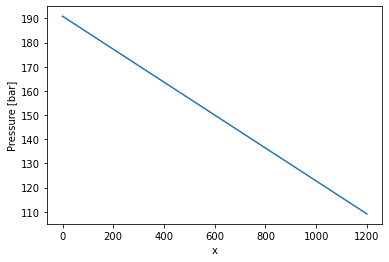

In [39]:
# %%
#Get the matrix that relates u to source f using the getMatrix function
K = get_matrix(nx, Psi) 

#creating vector with source values
f = np.zeros(nx)

apply_BCs(K, f, pres_inj, pres_prd, Psi) 
#matprint(K)

#Calculate p since p = K^-1 * f and K and f are known
P = np.linalg.solve(K, f)

# #### Plotting the result

# %%
plt.plot(x, P)
plt.xlabel('x')
plt.ylabel('Pressure [bar]')
plt.show()
